# Review comandi

Definire una funzione che mi permetta di cambiare un carattere di una parola in una data posizione:

In [5]:
def correggi(parola, pos, car):
    nuova_parola = parola[:pos] + car + parola[pos+1:]
    return nuova_parola
    
correggi("Andrea", 0, "a")

'andrea'

Costruire un generatore di parole casuali che si ferma quando incontra un punto.
Servono: 
-alfabeto -stop 

In [1]:
from string import ascii_lowercase
import numpy as np

In [3]:
alfabeto = ascii_lowercase + "."
i = np.random.randint(len(alfabeto))
char = alfabeto[i]
char

'i'

In [99]:
def genera(alfa, stop = ''):
    new_w = []
    char = None
    while char != stop:
        i = np.random.randint(len(alfa))
        char = alfa[i]
        new_w.append(char)
    return ''.join(new_w)
    
genera(alfabeto, ".")

'dazwgomdwwhrvcgjuqzl.'

calcolare il la lunghezza media delle parole:

In [101]:
stats = []
for n in range(1000):
    word = genera(alfabeto, '.')
    stats.append(word)
len(stats)

1000

In [104]:
c = 0
for w in stats:
    c = c + len(w)
print(c/len(stats))

26.838


Possiamo anche scriverla diversamente usando anche più stop del generatore:

In [116]:
from string import ascii_lowercase
import numpy as np
alpha = ascii_lowercase
alpha = list(alpha)
alpha.append('.')
alpha.append(' ')

In [126]:
def generate_word(alpha, term=['.',' ']): #qui possiamo mettere anche due term
    char = None
    output = []
    while char not in term: #ma dobbiamo confrontare char con un ogg singolo, non una lista che è un insieme
        i = np.random.randint(len(alpha))
        char = alpha[i]
        output.append(char)
    return "".join(output) 

generate_word(alpha)

'yojmtuyaavm '

E ha senso anche usare un insieme invece che una lista quando si definiscono i termini, così anche se scritti più volte verranno considerati solo una volta.

In [134]:
def generate_word(alpha, term={'.'}): #qui possiamo mettere anche due term
    char = None
    output = []
    while char not in term: #ma dobbiamo confrontare char con un ogg singolo, non una lista che è un insieme
        i = np.random.randint(len(alpha))
        char = alpha[i]
        output.append(char)
    return "".join(output)

generate_word(alpha=alpha, term = {' ', '.'} )

'rkpbmnebrcxddyndsuymgvckumcq '

Ricalcoliamo ora le statistiche:

In [139]:
stats = []
for i in range(1000):
    w = generate_word(alpha, term = {' ', '.'})
    stats.append(w)

c = 0
for w in stats:
    c = c + len(w)
print(c/len(stats))

13.922


L'istogramma serve per vedere quante parole da n lettere ci sono e poi metterle tutte in un grafico. Per fare questo possiamo introdurre la struttura dati del **dizionario**. Si tratta di un insieme di valori in coppia, di cui l'elemento di sinistra è la chiave e l'elemento di destra è la chiave. Le chiavi sono univoche perchè sono l'indice di riferimento all'interno del dizionario.
il dizionario deve ritornare {0:0, 1:10, 2: 30...}

In [140]:
dati = {'nome':'Andrea', 'cognome':'Mentasti', 'età': 'etè?'}
dati.keys()

dict_keys(['nome', 'cognome', 'età'])

In [141]:
dati.values()

dict_values(['Andrea', 'Mentasti', 'etè?'])

In [142]:
dati.items()

dict_items([('nome', 'Andrea'), ('cognome', 'Mentasti'), ('età', 'etè?')])

In [152]:
idx = {}
n = None
for word in stats:
    n = len(word)
    if n in idx.keys():
        idx[n] = idx[n] + 1
    else:
        idx[n] = 1
        
for k, v in idx.items():
    print(k, v)

22 15
76 1
12 33
7 45
2 63
19 20
23 8
11 41
9 26
26 8
49 4
4 47
20 15
13 40
6 53
51 4
8 53
32 7
15 27
10 36
24 12
5 64
17 27
18 17
59 6
16 13
1 74
3 65
52 2
14 25
39 5
21 11
30 8
41 2
28 6
37 4
31 6
65 1
45 3
67 2
42 1
25 14
29 9
53 1
27 17
48 4
36 7
58 2
40 4
43 2
33 8
70 1
35 6
38 3
54 3
34 5
61 1
99 1
63 2
44 2
62 2
72 1
46 1
83 1
47 1
68 1
66 1


# Fare questo processo con dei testi della lingua italiana

In [4]:
filename = "/Users/andre/OneDrive/Desktop/DATA/promessi_sposi.txt"
with open(filename, 'r') as infile:
    text = infile.readlines()

pulire i testi: il comando sopra crea una lista

In [5]:
new_text = []
for line in text:
    new_line = line.strip()
    if len(new_line) > 0:
        new_text.append(new_line)
    
' '.join(new_text)

"I Promessi sposi di Alessandro Manzoni Letteratura italiana Einaudi Edizione di riferimento: a cura di Angelo M archese, M ondadori, M ilano 1985 Letteratura italiana Einaudi Sommario Introduzione 1 Capitolo 1 5 Capitolo 11 25 Capitolo 111 40 Capitolo IV 57 Capitolo V 74 Capitolo VI 91 Capitolo VI 1 107 Capitolo VI 11 128 Capitolo IX 152 Capitolo X 175 Capitolo X1 200 Capitolo XII 221 Capitolo XIII 236 Capitolo XIV 253 Capitolo XV 271 Capitolo XVI 289 Capitolo XVII 306 Capitolo XVIII 323 Capitolo XIX 339 Capitolo XX 355 Capitolo XXI 371 C apitolo XXII 387 Capitolo XXIII 400 Capitolo XXIV 420 Capitolo XXV 448 Capitolo XXVI 464 Capitolo XXVII 481 Capitolo XXVIII 498 Letteratura italiana Einaudi Sommario Capitolo XXIX 521 Capitolo XXX 537 Capitolo XXXI 551 Capitolo XXXII 571 Capitolo XXXIII 592 Capitolo XXXIV 614 Capitolo XXXV 637 Capitolo XXXVI 652 Capitolo XXXVII 674 Capitolo XXXVIII 689 Letteratura italiana Einaudi iv INTRODUZIONE Â«L'H istoria si puÃ² veramente deffinire una guerra i

In [6]:
new_text = [x.strip() for x in text if len(x.strip())>0]

Adesso che abbiamo una lista di linee di testo possiamo fare il lavoro di contare le lettere presenti.

In [7]:
idx = {}

for l in new_text:
    for c in l:
        if c in idx.keys():
            idx[c] = idx[c]+1
        else:
            idx[c] = 1
            
idx['e']

122815

In [8]:
import MyLab1

MyLab1.change_char('Andrea', 'a')

('andrea', 'Andrea')

In [9]:
from MyLab1 import CharIndex

idx = CharIndex(min_char = 0)
idx

In [10]:
filename = "/Users/andre/OneDrive/Desktop/DATA/promessi_sposi.txt"

In [12]:
idx.index_text(filename)

In [13]:
idx.p('s')

0.04260095801197443

### Generate text with index

Ci serve un alfabeto --> possiamo chiamarlo con il metodo vocabulary della classe

In [14]:
import numpy as np

In [15]:
alpha = idx.vocabulary

Una volta preso alfabeto noi dobbiamo prendere una funzione per pescare casualmente da questo alfabeto (sempre per creare parole). Però usiamo un metodo diverso, noi usiamo un metodo numpy per fare sampling dall'alfabeto passando anche la distribuzione di probabilità da usare.

- numpy.random.choice( a, size, replace, p)
- a è un array 1D (lista)
- size dice quanti tirarne fuori e che forma dare
- devo chiedermi se con reinserimeto o senza (di default true)
- p è un array con la probabilità degli elementi

In [18]:
A = list(range(20))
np.random.choice(A) # <-- distribuzione uniforme
np.random.choice(A, 6) # <-- uniforme, size mi dice quanti ne voglio
np.random.choice(A, size = (3, 6))

array([[14,  3,  1, 12, 15,  4],
       [ 1,  1, 15,  6,  8,  4],
       [15,  1, 11, 10, 17, 18]])

In [19]:
np.random.choice(A, size = 6, replace = False, p = [.8, .1]+[.1/18]*18) 

# p mi dice che il primo ha 80% di prob, il secondo 10% e gli altri diciotto 10%/18

array([ 0, 11,  1, 13,  6,  8])

In [16]:
p = [idx.p(x) for x in alpha]  # <-- lista con le probabilità in ordine

In [21]:
#oppure

p=[]
for x in alpha:
    p.append(idx.p(x))

In [ ]:
# oppure posso zippare insieme sia alfabeto che probabilità in modo da formare
# un dizionario con lettera e probabilità. E poi passare in choice la lista di 
# keys e values.

In [26]:
np.random.choice(alpha, p=p)

'c'

### Come faccio ora le parole?

Il nostro progetto prevede di fermarsi quando si incontra un carattere.
Dobbiamo usare una funzione come facevamo prima.

In [23]:
# posso usare size

np.random.choice(alpha, size = 6, p=p)

#ma ovviamente ha dei limiti, è scomodo

array(['Ã', 'b', 'q', ' ', 'a', 'c'], dtype='<U1')

In [29]:
from string import punctuation
punctuation = punctuation

In [27]:
# carattere di terminazione:

def generate():
    word = []
    char = 'x'
    while char not in punctuation + ' ':
        char = np.random.choice(alpha, p=p)
        word.append(char)
    return''.join(word)

Noi adesso vogliamo riscrivere dei promessi sposi --> quante parole ci sono? tante quante gli spazi e la punteggiatura

In [30]:
n_words = 0
for k, v in idx.index.items():
    if k in punctuation + ' ':
        n_words = n_words + v
n_words

596568

In [ ]:
fake_promessi_sposi = [generate() for x in range(n_words)]

In [55]:
clean_fake_promessi_sposi = [x for x in fake_promessi_sposi if len(x) > 1]

In [59]:
new_text = ''.join(clean_fake_promessi_sposi)

In [60]:
with open('/Users/andre/OneDrive/Desktop/DATA/fake_promessi_sposi.txt', 'w') as fake:
    fake.write(new_text)

## Usiamo Pandas per migliorare

In [1]:
import pandas as pd
import numpy as np

In [2]:
true_file = "/Users/andre/OneDrive/Desktop/DATA/promessi_sposi.txt"
fake_file = '/Users/andre/OneDrive/Desktop/DATA/fake_promessi_sposi.txt'

In [3]:
from MyLab1 import CharIndex

In [4]:
Tidx = CharIndex (min_char = 0)
Fidx = CharIndex (min_char = 0)

Tidx.index_text(true_file)
Fidx.index_text(fake_file)

In [5]:
df = pd.DataFrame([pd.Series(Tidx.index), pd.Series(Fidx.index)]).T
df.columns = ['True', 'Fake']

In [6]:
df

,True,Fake
I,748.0,700.0
,236947.0,186256.0
P,1443.0,1548.0
r,69829.0,70564.0
o,98737.0,99260.0
...,...,...
³,11.0,6.0
x,13.0,15.0
§,1.0,NaN
W,3.0,4.0


<AxesSubplot:>

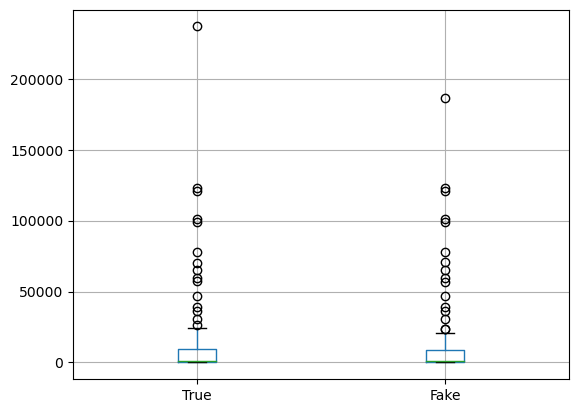

In [20]:
df.boxplot()

In [7]:
df.describe()
# al 75 percentile notiamo che i caratteri più usati non sono tanto usati
# quanto nei promessi sposi

,True,Fake
count,90.000000,88.000000
mean,15481.133333,15154.431818
std,35979.214600,33093.899369
min,1.000000,1.000000
25%,175.500000,171.750000
50%,1044.500000,1117.500000
75%,9697.250000,8860.500000
max,236947.000000,186256.000000


In [30]:
df['Tot'] = df.sum(axis = 1)

In [31]:
df

,True,Fake,Tot
I,748.0,700.0,1448.0
,236947.0,186256.0,423203.0
P,1443.0,1548.0,2991.0
r,69829.0,70564.0,140393.0
o,98737.0,99260.0,197997.0
...,...,...,...
³,11.0,6.0,17.0
x,13.0,15.0,28.0
§,1.0,NaN,1.0
W,3.0,4.0,7.0


### Misurare la divergenza: 

#### Presenza del carattere nei dati

In [8]:
def p(char, dataset):
    count = df.loc[char][dataset]
    den = df.sum()[dataset]
    return count/den

In [9]:
p('e', 'True')

0.08814671908889816

In [10]:
p('e', 'Fake')

0.09232072825980998

**KL divergence**

In [39]:
def kl(w, dataset):
    p_w = p(w, dataset)
    q_w = p(w, 'Tot')
    return p_w * np.log(p_w / q_w)

In [40]:
kl('e', 'Fake')

# se positivo vuol dire che è sovrautilizzata

0.002157724599769773